<a href="https://colab.research.google.com/github/mofuoku417/Multivariate-Time-Series-Forecasting-of-Crude-Palm-Oil-Price-Using-Machine-Learning-Techniques/blob/main/SVR_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

###Write function for numeric computation

In [189]:
#To compute Mean Directional Accuracy
def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

#Calculate the root mean squared error:
def RMSE(y_true, y_pred): 
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

#Calculate the mean absolute percentage error
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
    return mape

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [163]:
df = pd.read_csv('/content/gdrive/MyDrive/raw_data/df3.csv')
df.set_index('Month', inplace=True)
df.head()

,Unnamed: 0,cpo_pri,cno_pri,sbo_pri,pno_pri
Month,,,,,
2002-02-01,0,323,455,468.0,844.0
2002-03-01,1,345,546,485.0,799.0
2002-04-01,2,362,595,466.0,718.0
2002-05-01,3,376,636,442.0,614.0
2002-06-01,4,383,738,429.0,619.0


In [164]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [165]:
df = df[['cno_pri', 'sbo_pri', 'pno_pri', 'cpo_pri']]

In [166]:
df.head()

,cno_pri,sbo_pri,pno_pri,cpo_pri
Month,,,,
2002-02-01,455,468.0,844.0,323
2002-03-01,546,485.0,799.0,345
2002-04-01,595,466.0,718.0,362
2002-05-01,636,442.0,614.0,376
2002-06-01,738,429.0,619.0,383


In [167]:
df.tail()

,cno_pri,sbo_pri,pno_pri,cpo_pri
Month,,,,
2020-11-01,993,860.28,1366.87,826
2020-12-01,1031,910.82,1366.87,844
2021-01-01,1170,997.62,1383.90,944
2021-02-01,1275,1035.26,1426.71,949
2021-03-01,1412,1146.75,1471.32,1026


In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size = 0.2, shuffle = False)

In [162]:
len(y_test)

46

In [169]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
y_test = sc_y.transform(y_test.reshape(-1,1))

In [170]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import make_scorer

In [171]:
#tune parameters
param_grid = {'C': [0.1, 1, 10, 100],
             'gamma' :[1, 0.1, 0.01, 0.001,],
             'kernel' :['rbf', 'poly', 'linear'],
              'epsilon': [1e-4, 1e-3]}
scorer = make_scorer(mean_squared_error, greater_is_better=False)
model = SVR()
grid = GridSearchCV(SVR(),param_grid,cv = 10, scoring=scorer, refit = True, verbose =3)
grid.fit(X_train,np.ravel(y_train))

Fitting 10 folds for each of 96 candidates, totalling 960 fits
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=-0.011, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=-0.028, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=-0.016, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=-0.009, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=-0.040, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel=rbf ......................
[CV]  C=0.1, epsilon=0.0001, gamma=1, kernel=rbf, score=-0.003, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=1, kernel

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear, score=-0.012, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear .................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear, score=-0.024, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear .................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear, score=-0.028, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear .................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear, score=-0.009, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear .................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear, score=-0.054, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear .................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear, score=-0.005, total=   0.0s
[CV] C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear .................
[CV]  C=0.1, epsilon=0.0001, gamma=0.1, kernel=linear, score=-0.002, total= 

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   10.7s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.0001, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=3)

In [172]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

#best score
print(grid.best_score_)

{'C': 10, 'epsilon': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001, gamma=1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-0.013758527342701232


In [173]:
#reg = SVR(kernel = 'rbf', C = 10 ,epsilon = 0.001, gamma = 1)
#reg = reg.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)
grid_predictions.reshape(1,-1)

array([[0.94353967, 1.06476371, 1.03403595, 1.09574556, 1.04357692,
        0.97783222, 1.00607214, 1.04466507, 1.0556964 , 1.01939851,
        0.8862147 , 0.83784681, 0.73607067, 0.6821628 , 0.66831369,
        0.67521546, 0.66926011, 0.66310015, 0.66523055, 0.70282976,
        0.79301967, 1.13855203, 1.11477236, 0.89815692, 0.95131809,
        0.8486477 , 0.8215233 , 0.97374278, 1.06264822, 1.14128235,
        1.10410658, 1.16212736, 1.16054266, 1.25606711, 1.27035698,
        1.22929204, 1.16450065, 1.14115758, 1.03837428, 1.01221629,
        0.98627958, 0.95423177, 0.94877453, 0.83676919, 0.77155952,
        0.7013628 ]])

In [174]:
def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [175]:
MDA = mda(y_test, grid_predictions)

In [176]:
MDA

0.4508641975308642

In [192]:
MAE = mean_absolute_error(y_test, grid_predictions)
print('MAE value of the SVR Model is:', MAE)

MDA = mda(y_test, grid_predictions)
print('MDA value of the SVR Model is:', MDA)

MAPE = mean_absolute_percentage_error(y_test, grid_predictions)
print('MAPE value of the SVR Model is:', (MAPE))


RMSE = mean_squared_error(y_test,grid.predict(X_test), squared=False)
print('RMSE value of the SVR Model is:', (RMSE))


MSE = mean_squared_error(y_test,grid.predict(X_test))
print('MSE value of the SVR Model is:', (MSE))

MAE value of the SVR Model is: 0.4597262845713165
MDA value of the SVR Model is: 0.4508641975308642
MAPE value of the SVR Model is: 29.212823311956747
RMSE value of the SVR Model is: 0.6648843765466
MSE value of the SVR Model is: 0.442071234175761


(-5.0, 5.0)

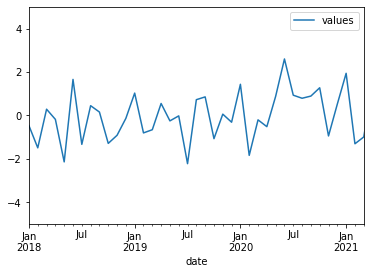

In [ ]:
import pandas as pd

# Create a random time series with values over 100 days
# starting from 1st March.
N = 100
dates = pd.date_range(start='2018-01-15', periods=N, freq='M')
ts = pd.DataFrame({'date': dates,
                   'values': np.random.randn(N)}).set_index('date')

# Create the plot and adjust x/y limits. The new x-axis
# ranges from mid-February till 1st July.
ax = ts.plot()
ax.set_xlim(pd.Timestamp('2018-01-15'), pd.Timestamp('2021-03'))
ax.set_ylim(-5, 5)

In [ ]:
print(y1.shape)

(230,)
